In [59]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

In [27]:
#  Notebook exeercising API
freedom_csv_path = "data/indexfreedom.csv"
#happy_csv_path = "data/TBD"

## Load Data

In [28]:
# READ freedom.csv

freedom_df = pd.read_csv(freedom_csv_path, encoding="utf-8")
freedom_df

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2008,VEN,Venezuela,Latin America & the Caribbean,3.000000,3.781688,2.369239,3.100000,0.000000,10.0,...,2.784695,4.578318,0.315142,2.864160,4.666936,4.22,140.0,5.257879,136.0,4.0
1454,2008,VNM,Vietnam,South Asia,6.666667,4.349101,5.694847,5.600000,9.496239,5.0,...,3.626593,7.306074,0.000000,4.574683,6.307577,6.19,103.0,6.420206,106.0,3.0
1455,2008,YEM,"Yemen, Rep.",Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,2008,ZMB,Zambia,Sub-Saharan Africa,4.800000,4.578003,3.688652,4.400000,7.878084,10.0,...,4.585391,5.124436,8.520369,6.681524,6.722175,7.15,57.0,6.647724,95.0,3.0


In [29]:
# copy the freedom_df and make 'coutnries the index
freedom_country_df = freedom_df.copy()
freedom_country_df.set_index(['countries'], inplace=True)
freedom_country_df.head()

,year,ISO_code,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
countries,,,,,,,,,,,,,,,,,,,,,
Albania,2016,ALB,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,10.00000,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
Algeria,2016,DZA,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,9.29403,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
Angola,2016,AGO,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,10.00000,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
Argentina,2016,ARG,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,10.00000,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
Armenia,2016,ARM,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,10.00000,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


## Binning Exploration
* Bin countries by High / Low hf_score, ef_score, pf_score, internet, money_growth, corrupt

* https://dfrieds.com/data-analysis/bin-values-python-pandas

### Score binning expriments
Cut Hi and Low bins around 
* score = 5
* score = (50%-tile)? 
* score = mean?

Thoughts
* 5 is a meaningless bin boundary
* 50-%tile will get even distribution in the bins
* mean gets better understanding of what is hi or low

#### Select the score columns we want to bin around

In [30]:
descr_cols = ['year', 'ISO_code']

score_columns = ['hf_score', "pf_score", "ef_score", 
                 'ef_money_growth', 
                 'pf_expression_internet',
                 'ef_regulation_business_bribes']
                 #'ef_government_consumption']

In [31]:
freedom_country_df[score_columns].shape

(1458, 6)

#### Drop NaN's from the Data

In [32]:
descr_cols + score_columns

['year',
 'ISO_code',
 'hf_score',
 'pf_score',
 'ef_score',
 'ef_money_growth',
 'pf_expression_internet',
 'ef_regulation_business_bribes']

In [33]:
freedom_scores_df = freedom_country_df[descr_cols + score_columns].dropna()
freedom_scores_df.shape

(1079, 8)

In [36]:
freedom_scores_df

,year,ISO_code,hf_score,pf_score,ef_score,ef_money_growth,pf_expression_internet,ef_regulation_business_bribes
countries,,,,,,,,
Albania,2016,ALB,7.568140,7.596281,7.54,8.986454,10.000000,4.050196
Algeria,2016,DZA,5.135886,5.281772,4.99,6.955962,7.500000,3.765515
Angola,2016,AGO,5.640662,6.111324,5.17,9.385679,7.500000,1.945540
Argentina,2016,ARG,6.469848,8.099696,4.84,5.233264,10.000000,3.260044
Armenia,2016,ARM,7.241402,6.912804,7.57,9.078264,7.500000,4.575152
...,...,...,...,...,...,...,...,...
Uruguay,2008,URY,7.947847,8.775693,7.12,6.715070,10.000000,7.112031
Venezuela,2008,VEN,5.257879,6.295759,4.22,6.056618,6.666667,2.784695
Vietnam,2008,VNM,6.420206,6.650413,6.19,8.095573,3.333333,3.626593


#### describe the data to consider options

In [34]:
freedom_scores_df.describe()

,year,hf_score,pf_score,ef_score,ef_money_growth,pf_expression_internet,ef_regulation_business_bribes
count,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000
mean,2012.186284,7.106070,7.318572,6.893568,8.662144,8.575070,4.945868
std,2.545241,1.030376,1.386155,0.874788,1.076316,2.351852,1.934835
min,2008.000000,4.095028,3.852272,2.880000,0.000000,0.000000,0.000000
25%,2010.000000,6.420817,6.209278,6.350000,8.268645,7.500000,3.410946
50%,2012.000000,6.997731,7.289304,7.060000,8.863048,10.000000,4.441035
75%,2014.000000,8.072569,8.708722,7.500000,9.347652,10.000000,6.437577
max,2016.000000,9.126313,9.568154,9.190000,9.999031,10.000000,9.623811


#### Bin around the means of each score

In [35]:
means = freedom_scores_df.mean()
means

year                             2012.186284
hf_score                            7.106070
pf_score                            7.318572
ef_score                            6.893568
ef_money_growth                     8.662144
pf_expression_internet              8.575070
ef_regulation_business_bribes       4.945868
dtype: float64

In [24]:

hf_bins = [0, means['hf_score'], 10]
freedom_scores_df['Bins_hf'] = \
    pd.cut(x=freedom_scores_df['hf_score'], bins=hf_bins, labels=['LOW', 'HI'])

pf_bins = [0, means['pf_score'], 10]
freedom_scores_df['Bins_pf'] = \
    pd.cut(x=freedom_scores_df['pf_score'], bins=pf_bins, labels=['LOW', 'HI'])

ef_bins = [0, means['ef_score'], 10]
freedom_scores_df['Bins_ef'] = \
    pd.cut(x=freedom_scores_df['ef_score'], bins=ef_bins, labels=['LOW', 'HI'])

ef_moneygrowth_bins = [0, means['ef_money_growth'], 10]
freedom_scores_df['Bins_ef_money_growth'] = \
    pd.cut(x=freedom_scores_df['ef_money_growth'], bins=ef_moneygrowth_bins, labels=['LOW', 'HI'])

pf_expr_net_bins = [0, means['pf_expression_internet'], 10]
freedom_scores_df['Bins_pf_expr_net'] = \
    pd.cut(x=freedom_scores_df['pf_expression_internet'], bins=pf_expr_net_bins, labels=['LOW', 'HI'])

ef_reg_bus_bribes_bins = [0, means['ef_regulation_business_bribes'], 10]
freedom_scores_df['Bins_ef_reg_bus_bribes'] = \
    pd.cut(x=freedom_scores_df['ef_regulation_business_bribes'], bins=ef_reg_bus_bribes_bins , labels=['LOW', 'HI'])

bin_columns = ['Bins_hf',
               'Bins_pf',
               'Bins_ef', 
               'Bins_ef_money_growth', 
               'Bins_pf_expr_net',
               'Bins_ef_reg_bus_bribes'
#               'Bins_ef_government_consumption'
              ]
# cols = descr_cols + score_columns + bin_columns
# cols
# freedom_scores_df[cols]

freedom_scores_df

,year,ISO_code,hf_score,pf_score,ef_score,ef_money_growth,pf_expression_internet,ef_regulation_business_bribes,Bins_hf,Bins_pf,Bins_ef,Bins_ef_money_growth,Bins_pf_expr_net,Bins_ef_reg_bus_bribes
countries,,,,,,,,,,,,,,
Albania,2016,ALB,7.568140,7.596281,7.54,8.986454,10.000000,4.050196,HI,HI,HI,HI,HI,LOW
Algeria,2016,DZA,5.135886,5.281772,4.99,6.955962,7.500000,3.765515,LOW,LOW,LOW,LOW,LOW,LOW
Angola,2016,AGO,5.640662,6.111324,5.17,9.385679,7.500000,1.945540,LOW,LOW,LOW,HI,LOW,LOW
Argentina,2016,ARG,6.469848,8.099696,4.84,5.233264,10.000000,3.260044,LOW,HI,LOW,LOW,HI,LOW
Armenia,2016,ARM,7.241402,6.912804,7.57,9.078264,7.500000,4.575152,HI,LOW,HI,HI,LOW,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,2008,URY,7.947847,8.775693,7.12,6.715070,10.000000,7.112031,HI,HI,HI,LOW,HI,HI
Venezuela,2008,VEN,5.257879,6.295759,4.22,6.056618,6.666667,2.784695,LOW,LOW,LOW,LOW,LOW,LOW
Vietnam,2008,VNM,6.420206,6.650413,6.19,8.095573,3.333333,3.626593,LOW,LOW,LOW,LOW,LOW,LOW


In [11]:
### Print out the shapes of each bin
[ print(f"Bin Counts ({bin}):\n{freedom_scores_df[bin].value_counts()}\n") for bin in bin_columns ]

Bin Counts (Bins_hf):
LOW    579
HI     500
Name: Bins_hf, dtype: int64

Bin Counts (Bins_pf):
LOW    549
HI     530
Name: Bins_pf, dtype: int64

Bin Counts (Bins_ef):
HI     607
LOW    472
Name: Bins_ef, dtype: int64

Bin Counts (Bins_ef_money_growth):
HI     648
LOW    428
Name: Bins_ef_money_growth, dtype: int64

Bin Counts (Bins_pf_expr_net):
HI     709
LOW    350
Name: Bins_pf_expr_net, dtype: int64

Bin Counts (Bins_ef_reg_bus_bribes):
LOW    637
HI     441
Name: Bins_ef_reg_bus_bribes, dtype: int64



[None, None, None, None, None, None]

In [53]:
##  Tset Plot Corrputopn vs Pf Score

corruption = freedom_scores_df["ef_regulation_business_bribes"].values
pf_score = freedom_scores_df["pf_score"].values
#countries = freedom_scores_df["countries"].values
corruption.shape

(1079,)

In [88]:
#my_randoms = random.sample(range(10), 11)
#my_randoms

corruptMean = means['ef_regulation_business_bribes']
corruptHiLoX = [corruptMean for x in range(11)]
corruptHiLoY = [y for y in range(11)]
corruptHiLoY

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

r^2: 0.25802163579944576
p-value: 7.663675345025211e-72


Text(1.9458683880945333, 0, 'Low Corrupt')

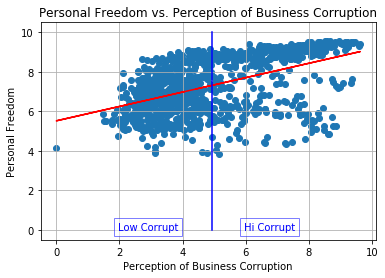

In [96]:
fig, ax = plt.subplots()

ax.scatter(corruption, pf_score)

plt.title("Personal Freedom vs. Perception of Business Corruption")
plt.xlabel("Perception of Business Corruption")
plt.ylabel("Personal Freedom")
mask = ~np.isnan(corruption) & ~np.isnan(pf_score)
slope, intercept, r_value, p_value, std_err = stats.linregress(corruption[mask], pf_score[mask])
regression_line = slope * corruption + intercept
plt.plot(corruption, regression_line, 'r')
plt.grid()
print(f"r^2: {r_value*r_value}")
print(f"p-value: {p_value}")

# plot Hi-Lo Corruption line
plt.plot(corruptHiLoX, corruptHiLoY, 'b')
plt.text(corruptMean + 1, 0, "Hi Corrupt", color='blue', bbox=dict(fc='w', ec='b', alpha=0.5))
plt.text(corruptMean - 3, 0, "Low Corrupt", color='blue', bbox=dict(fc='w', ec='b', alpha=0.5))